In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1-2017.csv')

In [3]:
print("{:,} order lines for {:,} orders".format(len(df), df.ORDER_NUMBER.nunique()))
df.head()

144,339 order lines for 59,372 orders


,DATE FORMAT,ORDER_NUMBER,SKU,PCS
0,01/01/2017,835220,290731,1.0
1,01/01/2017,835220,373272,1.0
2,01/01/2017,835214,362101,1.0
3,01/01/2017,835215,215515,1.0
4,01/01/2017,835215,287995,1.0


### Calculate Volume Prepared per SKU (BOX)

In [4]:
# Number of BOX per SKU
df_par = pd.DataFrame(df.groupby(['SKU'])['PCS'].sum())
df_par.columns = ['BOX']
df_par

,BOX
SKU,
1189,1.0
1330,2.0
2354,6.0
2356,2.0
3055,1.0
...,...
387338,2.0
387365,2.0
387366,2.0


In [5]:
# Sort values descending
df_par.sort_values(['BOX'], ascending = False, inplace = True)
# Add index column
df_par.reset_index(inplace = True)
df_par

,SKU,BOX
0,359803,4810.0
1,290478,4132.0
2,366639,4104.0
3,359958,4062.0
4,253500,3879.0
...,...,...
4859,299866,1.0
4860,299636,1.0
4861,299631,1.0
4862,299630,1.0


In [6]:
# Cumulative Sum of BOX per SKU
df_par['CumSum'] = df_par['BOX'].cumsum()

# Percentage of Cumulative Sum of BOX per SKU
df_par['%CumSum'] = (100 * df_par['CumSum']/df_par['BOX'].sum())

# Percentage of SKU count
df_par['%SKU'] = (100 * df_par.index + 1).astype(float)/(df_par.index.max() + 1)

print("Pareto Principle for {:,} unique SKU.".format(len(df_par)))
df_par

Pareto Principle for 4,864 unique SKU.


,SKU,BOX,CumSum,%CumSum,%SKU
0,359803,4810.0,4810.0,2.911658,0.000206
1,290478,4132.0,8942.0,5.412898,0.020765
2,366639,4104.0,13046.0,7.897190,0.041324
3,359958,4062.0,17108.0,10.356058,0.061883
4,253500,3879.0,20987.0,12.704149,0.082442
...,...,...,...,...,...
4859,299866,1.0,165194.0,99.997579,99.897410
4860,299636,1.0,165195.0,99.998184,99.917969
4861,299631,1.0,165196.0,99.998789,99.938528
4862,299630,1.0,165197.0,99.999395,99.959087


In [7]:
# > 80% Volume
df_par80 = df_par[df_par['%CumSum'] > 80].copy()
perc_sku80 = df_par80['%SKU'].min()
perc_sum80 = df_par80['%CumSum'].min()

# 20% SKU
df_sku20 = df_par[df_par['%SKU'] > 20].copy()
perc_sku20 = df_sku20['%SKU'].min()
perc_sum20 = df_sku20['%CumSum'].min()

### Visualize %BOX = f(%SKU) to show the Pareto Principle

80% of Orders are established by only 12.54 % of SKU.
Blue marker: 20% of SKU
Red  marker: 80% of Boxes


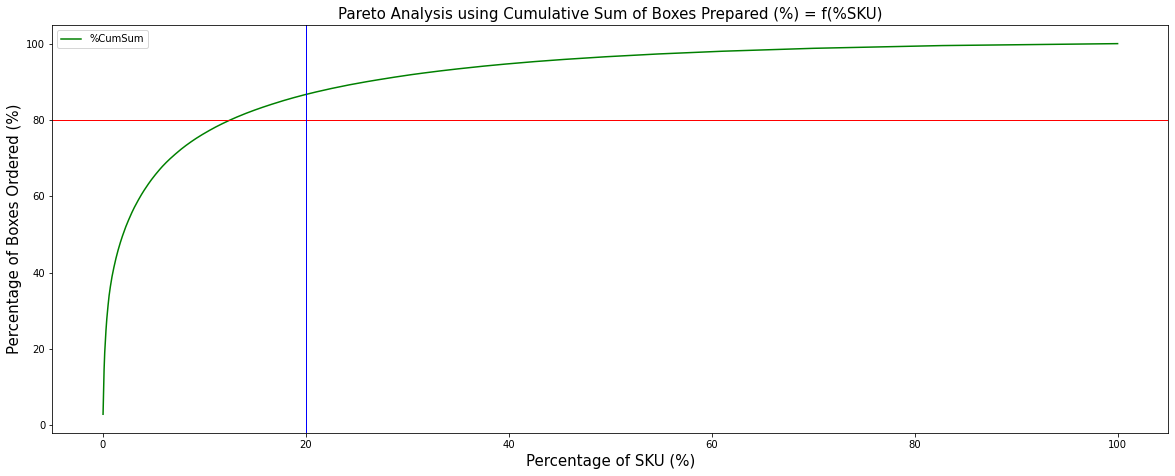

In [8]:
ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (20,7.5), color = 'green')

# 80% Volume
ax.axhline(perc_sum80 , color="red", linestyle="-", linewidth = 1.0)
# ax.axvline(perc_sku80, color="red", linestyle="-", linewidth = 1.0)
# 20% SKU
# ax.axhline(perc_sum20 , color="blue", linestyle="-", linewidth = 1.0)
ax.axvline(perc_sku20, color="blue", linestyle="-", linewidth = 1.0)

plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Boxes Ordered (%)',fontsize=15)
plt.title('Pareto Analysis using Cumulative Sum of Boxes Prepared (%) = f(%SKU)', fontsize = 15)
print('80% of Orders are established by only {:.2f} % of SKU.'.format(perc_sku80))
print('Blue marker: 20% of SKU')
print('Red  marker: 80% of Boxes')
plt.show()

> The threshold of 80% volume is already reached before having 20% of SKU 

### Further analysis
How much % BOX represent 10% of the SKU picked?

10% of SKU make 76.55% of the total volume.


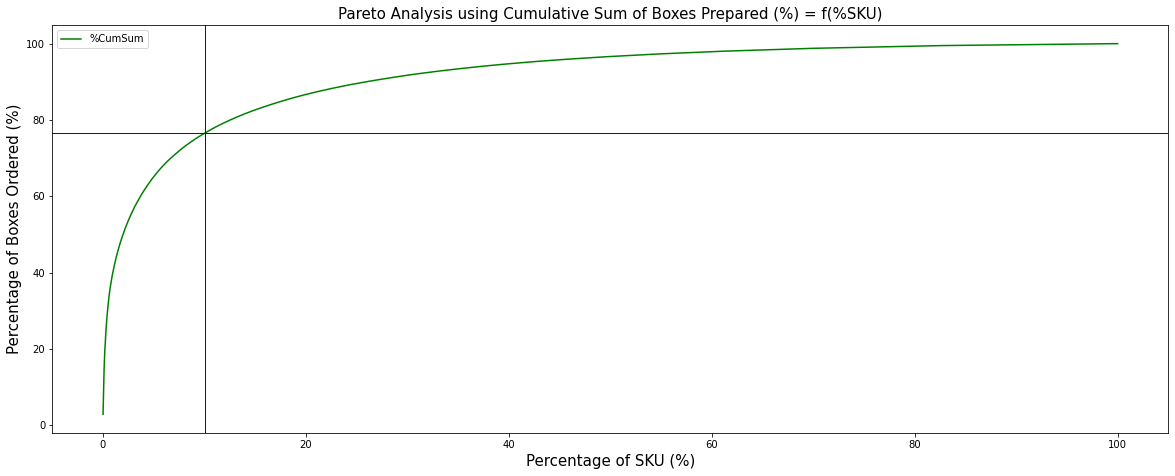

In [9]:
# 10% SKU
df_sku10 = df_par[df_par['%SKU'] > 10].copy()
perc_sku10 = df_sku10['%SKU'].min()
perc_sum10 = df_sku10['%CumSum'].min()
print('10% of SKU make {:.2f}% of the total volume.'.format(perc_sum10))

ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (20,7.5), color = 'green')
ax.axvline(perc_sku10, color="blue", linestyle="-", linewidth = 1.0)
ax.axhline(perc_sum10, color="blue", linestyle="-", linewidth = 1.0)

plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Boxes Ordered (%)',fontsize=15)
plt.title('Pareto Analysis using Cumulative Sum of Boxes Prepared (%) = f(%SKU)', fontsize = 15)
plt.show()


### Conclusions
20% of high rotation SKU make more than 80% of the volume.<br> 80% of low rotation SKU make less than 80% of the volume outbound. <br>
By grouping high rotations in a specific zone that is close to the docks, the productivity can be improved by reducing picking distance. This will be demonstrated in my other project: __Improve Warehouse Productivity using Spatial Clustering with Python__

### Group High Rotation SKU in dedicated picking zones

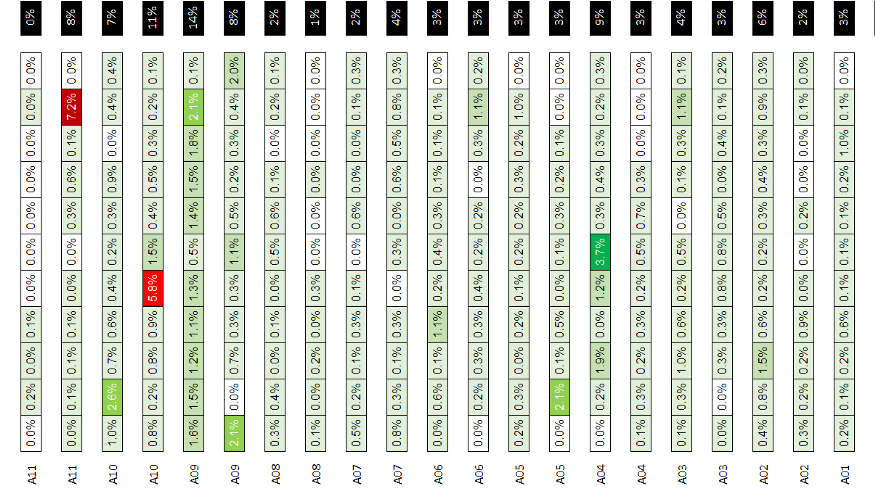